In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [19]:
NUM_OF_BUS = 10000
NUM_OF_PERSON = 100000

In [107]:
class BusTimeModel:
    """
    BusTimeModel은 실험통계학 과제01을 위해 필요한 클래스

    Attributes:
        __number_of_bus (int): 정류장으로 오는 버스의 총 대수
        __number_of_person (int): 버스를 타러 오는 사람의 총 명수
        bus_interval (numpy.array): 버스의 배차간격(분)
        bus (numpy.array): 버스가 오는 시간(분)
        person (numpy.array): 사람이 버스정류장에 오는 시간정보(분)
        wait (numpy.array): 사람이 버스정류장에서 기다리는 시간정보(분)
    """

    def __init__(self, avg=10, std=0.2, num_of_bus=NUM_OF_BUS, num_of_person=NUM_OF_PERSON):
        self.__number_of_bus = num_of_bus
        self.__number_of_person = num_of_person
        self.bus_interval = np.random.normal(avg, std, self.__number_of_bus)
        self.bus = self.bus_interval.cumsum()
        self.person = self.__set_person()
        self.wait = self.__set_wait()

    def __set_person(self):
        """
        __set_person은 사람이 버스정류장에 오는 시간정보를 반환한다
        사람이 버스정류장에 오는 시간은 최소 min, 최대 max이고 Uniform 하다고 가정(min: 0, max: 버스가 마지막으로 오는 시간)

        Returns:
            person: 사람이 버스정류장에 오는 정렬되어 있는 시간정보
        """
        person = np.random.uniform(0, self.bus[-1], self.__number_of_person)
        person.sort()
        return person

    def __set_wait(self):
        """
        __set_wait은 사람이 버스정류장에서 기다리는 시간정보를 반환한다

        Returns:
            wait: 사람이 버스정류장에서 기다리는 시간정보
        """
        wait = np.zeros(self.__number_of_person)

        for idx, val in enumerate(self.person):
            num_of_passed_bus = np.sum(self.bus < val)
            wait[idx] = self.bus[num_of_passed_bus] - self.person[idx]
        return wait

    def summary(self):
        """
        클래스의 정보를 출력한다
        Returns:
            None
        """
        print('=' * 20 + ' Model summary ' + '=' * 20)
        print(f'Number of bus: {self.__number_of_bus}')
        print('bus interval mean: %.3f' % self.bus_interval.mean())
        print('bus interval std: %.3f' % self.bus_interval.std())
        print(f'\nNumber of person: {self.__number_of_person}')
        print('person mean: %.3f' % self.person.mean())
        print('person std: %.3f' % self.person.std())
        print('wait mean: %.3f' % self.wait.mean())
        print('wait std: %.3f' % self.wait.std())

    def plot_pdf_and_cdf(self, bins=100):
        """
        plot_pdf_cdf는 사람이 기다리는 시간정보의 확률밀도함수, 누적확률밀도함수를 나타낸다
        Args:
            bins: 도수분포에 사용될 구간의 개수
        Returns:
            None
        """
        hist, bins = np.histogram(self.wait, bins=bins)
        cum_hist = np.cumsum(hist)
        sum_hist = cum_hist[-1]
        pdf = hist / sum_hist
        cdf = cum_hist / sum_hist

        fig, ax = plt.subplots()

        ax.set_xlabel('time (min)')
        ax.plot(bins[1: ], pdf, color='blue', label='pdf')
        ax.set_ylabel('pdf')
        ax2 = ax.twinx()
        ax2.plot(bins[1: ], cdf, color='red', label='cdf')
        ax2.set_ylabel('cdf')
        fig.legend(loc=(0.15, 0.2))
        plt.show()

    def plot_wait_sample_mean(self, sample_size=100, num_of_iter=1000):
        """
        plot_wait_sample_mean은 sample_size의 크기로 표본을 추출하고,
        num_of_iter만큼의 시행횟수로 샘플링을 진행하여 표본평균을 추출하여 plot한다.
        Args:
            sample_size: 표본의 크기
            num_of_iter: 시행횟수
        Returns:
            None
        """
        sample = np.zeros(num_of_iter)
        for i in range(num_of_iter):
            sample[i] = np.mean(np.random.choice(self.wait, size=sample_size, replace=False))
        sns.displot(sample)

    def get_probability(self, t, bins=100):
        """
        get_probability는 승객이 t 시점 이전에 버스를 탔을 확률을 계산하여 번환한다.
        Args:
            t: 특정 시점
            bins: histogram을 만들 때 나눌 구간의 개수 혹은 구간
        Returns:
            버스를 탔을 확률 (float)
        """
        hist, bins = np.histogram(self.wait, bins=bins)
        cum_hist = np.cumsum(hist)
        sum_hist = cum_hist[-1]
        cdf = cum_hist / sum_hist

        idx = np.sum(bins < t)
        return cdf[idx]

In [108]:
model_a = BusTimeModel(avg=10, std=0.2)
model_b = BusTimeModel(avg=10, std=2)

print('model a summary')
model_a.summary()
print('\nmodel b summary')
model_b.summary()

model a summary
==================== Model summary ====================
Number of bus: 10000
bus interval mean: 10.002
bus interval std: 0.198

Number of person: 100000
person mean: 49863.997
person std: 28926.857
wait mean: 5.017
wait std: 2.897

model b summary
==================== Model summary ====================
Number of bus: 10000
bus interval mean: 9.998
bus interval std: 2.004

Number of person: 100000
person mean: 50023.434
person std: 28814.820
wait mean: 5.217
wait std: 3.217


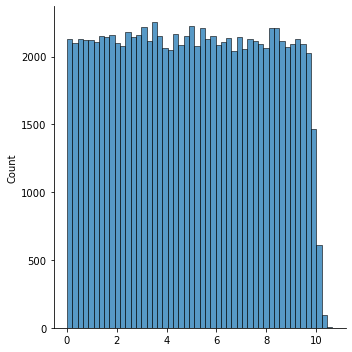

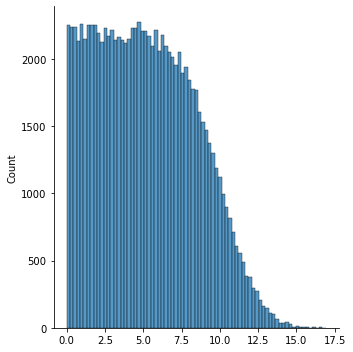

In [90]:
sns.displot(model_a.wait)
sns.displot(model_b.wait)

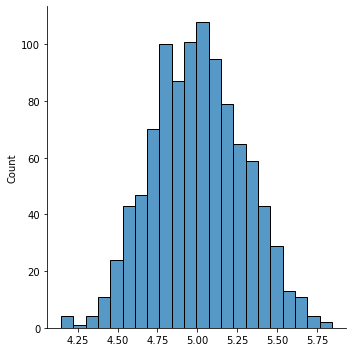

In [91]:
model_a.plot_wait_sample_mean()

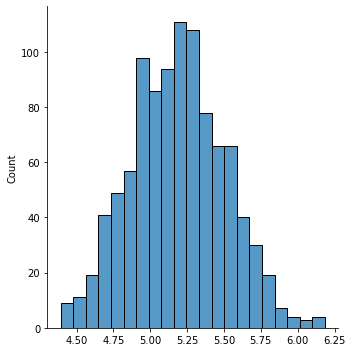

In [92]:
model_b.plot_wait_sample_mean()

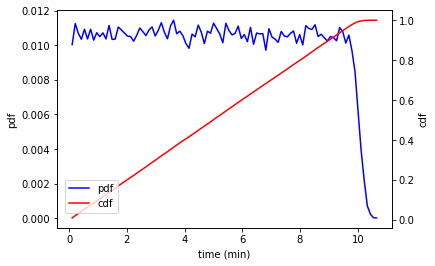

In [93]:
model_a.plot_pdf_and_cdf()

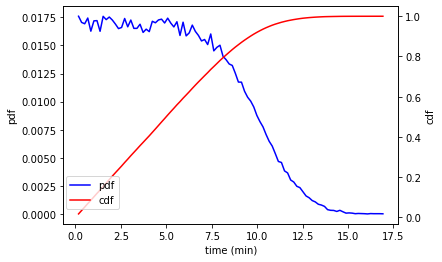

In [94]:
model_b.plot_pdf_and_cdf()

In [112]:
print('[모델 A] 4분 시점 이전에 버스를 탈 확률: %.4f' % model_a.get_probability(t=4))
print('[모델 B] 7분 시점 이전에 버스를 탈 확률: %.4f' % model_a.get_probability(t=7))

[모델 A] 4분 시점 이전에 버스를 탈 확률: 0.4185
[모델 B] 7분 시점 이전에 버스를 탈 확률: 0.7117
